<a href="https://colab.research.google.com/github/raisaksh1/Machine-Learning/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/players_data_with_all_info.csv")
df_1 = pd.read_csv("/teams.csv")

In [7]:
df.head()

,id,firstname,lastname,fullname,image_path,dateofbirth,gender,battingstyle,bowlingstyle,position,updated_at,continent_id,continent_name,country_id,country_name,country_image_path
0,2,Ahmed,Shehzad,Ahmed Shehzad,https://cdn.sportmonks.com/images/cricket/play...,23-11-1991,m,right-hand-bat,legbreak,Batsman,2020-03-31T05:00:31.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
1,3,Anwar,Ali,Anwar Ali,https://cdn.sportmonks.com/images/cricket/play...,25-11-1987,m,right-hand-bat,right-arm-fast-medium,Bowler,2020-12-14T18:58:56.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
2,4,Sarfraz,Ahmed,Sarfraz Ahmed,https://cdn.sportmonks.com/images/cricket/play...,22-05-1987,m,right-hand-bat,right-arm-offbreak,Wicketkeeper,2020-04-07T08:51:02.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
3,5,Azhar,Ali,Azhar Ali,https://cdn.sportmonks.com/images/cricket/play...,19-02-1985,m,right-hand-bat,legbreak,Batsman,2020-04-01T02:28:23.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
4,6,Fakhar,Zaman,Fakhar Zaman,https://cdn.sportmonks.com/images/cricket/play...,10-04-1990,m,left-hand-bat,slow-left-arm-orthodox,Batsman,2020-04-02T02:22:22.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...


In [8]:
df_1.head()

,id,name,code,image_path,country_id,national_team,updated_at
0,1,Pakistan,PAK,https://cdn.sportmonks.com/images/cricket/team...,190324,True,2018-11-29T11:47:20.000000Z
1,10,India,IND,https://cdn.sportmonks.com/images/cricket/team...,190324,True,2018-11-29T11:47:20.000000Z
2,36,Australia,AUS,https://cdn.sportmonks.com/images/cricket/team...,190324,True,2018-11-29T11:47:20.000000Z
3,37,Bangladesh,BGD,https://cdn.sportmonks.com/images/cricket/team...,190324,True,2018-11-29T11:47:20.000000Z
4,38,England,ENG,https://cdn.sportmonks.com/images/cricket/team...,190324,True,2019-01-29T11:07:04.000000Z


In [9]:
df.shape

(17385, 16)

In [10]:
df_1.shape

(78, 7)

In [15]:
merged_df = pd.merge(df, df_1, on = 'country_id', how = 'outer')

In [16]:
merged_df

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,id_x,firstname,lastname,fullname,image_path_x,dateofbirth,gender,battingstyle,bowlingstyle,position,...,continent_name,country_id,country_name,country_image_path,id_y,name,code,image_path_y,national_team,updated_at_y
0,2.0,Ahmed,Shehzad,Ahmed Shehzad,https://cdn.sportmonks.com/images/cricket/play...,23-11-1991,m,right-hand-bat,legbreak,Batsman,...,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,Anwar,Ali,Anwar Ali,https://cdn.sportmonks.com/images/cricket/play...,25-11-1987,m,right-hand-bat,right-arm-fast-medium,Bowler,...,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,Sarfraz,Ahmed,Sarfraz Ahmed,https://cdn.sportmonks.com/images/cricket/play...,22-05-1987,m,right-hand-bat,right-arm-offbreak,Wicketkeeper,...,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,Azhar,Ali,Azhar Ali,https://cdn.sportmonks.com/images/cricket/play...,19-02-1985,m,right-hand-bat,legbreak,Batsman,...,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,Fakhar,Zaman,Fakhar Zaman,https://cdn.sportmonks.com/images/cricket/play...,10-04-1990,m,left-hand-bat,slow-left-arm-orthodox,Batsman,...,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,190324,NaN,NaN,2255.0,Tanzania,TZA,https://cdn.sportmonks.com/images/cricket/team...,False,2022-10-29T19:55:07.000000Z
26088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14566636,NaN,NaN,272.0,USA,USA,https://cdn.sportmonks.com/images/cricket/team...,False,2019-01-26T11:48:13.000000Z
26089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99474,NaN,NaN,429.0,Singapore,SIN,https://cdn.sportmonks.com/images/cricket/team...,False,2019-09-24T19:55:02.000000Z
26090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99474,NaN,NaN,1065.0,Isle of Man,IMN,https://cdn.sportmonks.com/images/cricket/team...,False,2020-08-11T09:46:20.000000Z


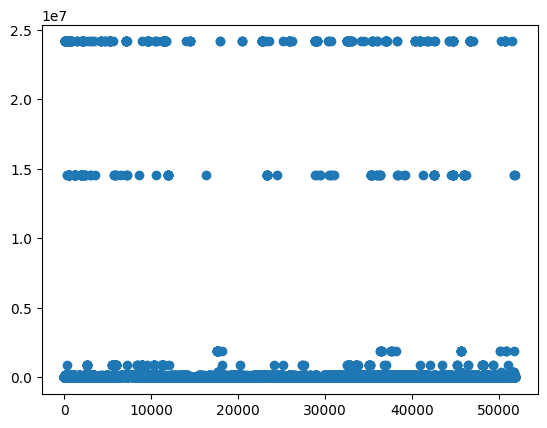

In [34]:
plt.scatter(merged_df['id_x'], merged_df['country_id'])

In [35]:
x1 = np.array(merged_df['id_x'])
x2 = np.array(merged_df['country_id'])

In [36]:
from sklearn.impute import KNNImputer, SimpleImputer

In [37]:
knn = KNNImputer(n_neighbors = 5)

x1_imputed = knn.fit_transform(x1.reshape(-1,1))
x2_imputed = knn.transform(x2.reshape(-1,1))

In [38]:
X = np.column_stack((x1_imputed, x2_imputed))

In [39]:
X

array([[2.00000000e+00, 5.21260000e+04],
       [3.00000000e+00, 5.21260000e+04],
       [4.00000000e+00, 5.21260000e+04],
       ...,
       [2.13855061e+04, 9.94740000e+04],
       [2.13855061e+04, 9.94740000e+04],
       [2.13855061e+04, 9.94740000e+04]])

In [40]:
from sklearn.cluster import KMeans

In [41]:
wc = []

for i in range (1,11):
  km = KMeans(n_clusters = i)
  km.fit_predict(X)
  wc.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

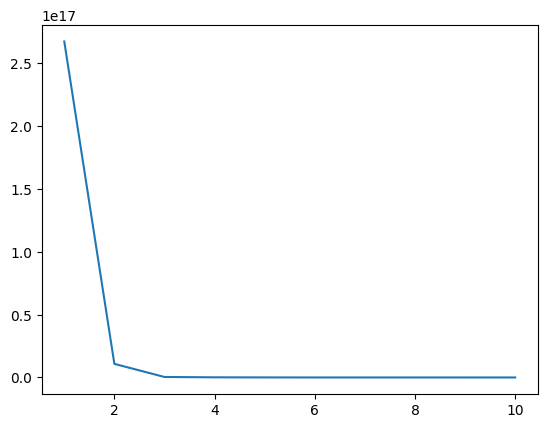

In [43]:
plt.plot(range(1,11), wc)
plt.show()

In [44]:
km1 = KMeans(n_clusters = 3)

In [46]:
y_means1 = km1.fit_predict(np.array(X))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
y_means1

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

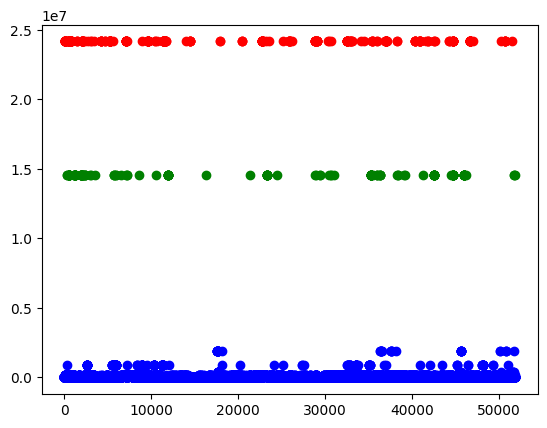

In [48]:
plt.scatter(X[y_means1 == 0,0], X[y_means1 == 0, 1], color = 'blue')
plt.scatter(X[y_means1 == 1,0], X[y_means1 == 1, 1], color = 'red')
plt.scatter(X[y_means1 == 2,0], X[y_means1 == 2, 1], color = 'green')